<center> <h1> Data Exploring, Data cleaning & Data pre-processing </h1> </center>
<center> <h2>  Natural Language Processing </h2> </center>


<a id="step-1"></a>
## Importing the required libraries

In [1]:
import re
import string
import scipy
import pickle
import os,glob
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
from prettytable import PrettyTable
from joblib import dump, load
from astropy.table import Table, Column
from sklearn.utils import shuffle

warnings.filterwarnings("ignore")

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


ModuleNotFoundError: No module named 'prettytable'

### Reading Training Data

In [19]:


# Read the Data in CSV Format
training_data = pd.read_csv('British-literature.csv')
training_data = pd.DataFrame(training_data)
#Load the Training Data
print("Training Data:")
print("=============\n")
training_data.head(30)

Training Data:



,text
0,"0,""['Even the Cock-lane ghost had been laid on..."
1,"1,""[' It is likely enough that in the rough ou..."
2,"2,""[' Daring burglaries by armed men, and high..."
3,"3,""["""" Giles's, to search for contraband goods..."
4,"4,""["""" In the midst of them, the hangman, ever..."
5,"5,""[' All these things, and a thousand like th..."
6,"6,""[' Environed by them, while the Woodman and..."
7,"7,""[' - 7 II The Mail It was the Dover road th..."
8,"8,""[' He walked up hill in the mire by the sid..."
9,"9,""[' - 8 There was a steaming mist in all the..."


In [25]:
training_data["text"] = training_data["text"].apply(lambda x: " ".join(x.split(",")[:-3]))

In [27]:
training_data.head(30)

,text
0,"0 ""['Even the Cock-lane ghost had been laid on..."
1,"1 ""[' It is likely enough that in the rough ou..."
2,"2 ""[' Daring burglaries by armed men and high..."
3,"3 ""["""" Giles's to search for contraband goods..."
4,"4 ""["""" In the midst of them the hangman ever..."
5,"5 ""[' All these things and a thousand like th..."
6,"6 ""[' Environed by them while the Woodman and..."
7,"7 ""[' - 7 II The Mail It was the Dover road th..."
8,"8 ""[' He walked up hill in the mire by the sid..."
9,"9 ""[' - 8 There was a steaming mist in all the..."


### Understand Training Data

In [28]:
print("\n\nAttributes Names in Train Dataset:")
print("==================================\n")

print(training_data.columns)

print("\n\nNumber of instances in Train Dataset:")
print("====================================\n")

total_training_data_instances= len(training_data.index)
print("Total Train Data instances:",total_training_data_instances)



Attributes Names in Train Dataset:

Index(['text'], dtype='object')


Number of instances in Train Dataset:

Total Train Data instances: 22724


In [29]:
training_data.describe()

,text
count,22724
unique,21524
top,.']
freq,277


# Text Preprocessing

Natural Language Processing (NLP) is a branch of Data Science which deals with Text data. Apart from numerical data, Text data is available to a great extent which is used to analyze and solve business problems. But before using the data for analysis or prediction, processing the data is important.

    Removal of duplicate data
    Removal of irrelevant data
    Removing punctuations 
    Removing URLs
    Removing Stop words
    Conversion to lowercase
    Remove Hash Tages
    Replace Emojis
    Lower casing
    Tokenization
    Stemming
    Lemmatization

We used RegEx for data preprocessing, A RegEx, or Regular Expression, is a sequence of characters that forms a search pattern. RegEx can be used to check if a string contains the specified search pattern.

In [30]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\waqar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\waqar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
!pip install langdetect
from langdetect import detect

In [32]:


def data_preprocessing(text):
    
    # Remove all URLs
    text = re.sub(r'http\S+', '', text)

    # Remove all names starting with @
    text = re.sub(r'@\w+', '', text)

    # Remove all hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove all numeric digits
    text = re.sub(r'\d+', '', text)

    # Remove all punctuation marks
    text = text.translate(str.maketrans('', '', string.punctuation))

        # remove all non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]+', ' ', text)
    # Remove all non-english characters
    if len(text) > 10:
        try:
            if detect(text) != 'en':
                text = ''
        except:
            text = ''

    # regular expression matches any string that starts with $
    text = re.sub(r'\$\w+\s*', '', text)

    # regular expression matches any string that starts with Contract: 0x (Contract: 0x) 
    text = re.sub(r'Contract: 0x\w+\s*', '', text)

    #regular expression matches one or more whitespace characters (\s+) and replaces them with a single space (' ')
    text = re.sub(r'\s+', ' ', text)
    
    # Remove all single-character words
    text = re.sub(r'\b\w\b', '', text)

    # convert the text to lower case
    text = text.lower()

    # Remove all English Stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word.lower() not in stop_words)

        
    return text

### Text Preprocessing of Training Data

In [33]:
# Apply the Preprocessing on Input Data Comments of Training Data
training_data['text'] = training_data['text'].apply(data_preprocessing)
preprocessed_training_data = training_data

print("\nTraining Data After Pre-processing:")
print("====================================\n")
preprocessed_training_data.head(30)


Training Data After Pre-processing:



,text
0,even cocklane ghost laid round dozen years rap...
1,likely enough rough outhouses tillers heavy la...
2,daring burglaries armed men highway robberies ...
3,giless search contraband goods mob fired muske...
4,midst hangman ever busy ever worse useless con...
5,things thousand like came pass close upon dear...
6,environed woodman farmer worked unheeded two l...
7,ii mail dover road lay friday night late novem...
8,walked hill mire side mail rest passengers lea...
9,steaming mist hollows roamed forlornness hill ...


## Shape of the Training Data

In [34]:
preprocessed_training_data.shape

(22724, 1)

## Identify and prints duplicate rows 

In [35]:
# Extract duplicates
duplicates = preprocessed_training_data[preprocessed_training_data.duplicated()]
duplicates.head(30)

,text
37,matter
39,
56,
93,
99,hope care live
100,
102,buried long
103,almost eighteen years
104,abandoned hope dug
105,long ago


# Shape of Duplicated Data

In [36]:
duplicates.shape

(3413, 1)

## Removal of Duplicates and Null values

In [37]:
def remove_duplicates_and_nulls(dataframe):
    """
    Removes duplicate and null values from a Pandas DataFrame.
    """
    # Remove duplicates
    dataframe.drop_duplicates(inplace=True)

    # Remove null values
    dataframe.dropna(inplace=True)

    return dataframe

In [38]:
# apply function to remove duplicates and null values
preprocessed_training_data = remove_duplicates_and_nulls(preprocessed_training_data)

## Shape of data after removing Duplicates 

In [39]:
preprocessed_training_data.shape

(19311, 1)

In [40]:
preprocessed_training_data

,text
0,even cocklane ghost laid round dozen years rap...
1,likely enough rough outhouses tillers heavy la...
2,daring burglaries armed men highway robberies ...
3,giless search contraband goods mob fired muske...
4,midst hangman ever busy ever worse useless con...
...,...
22719,men talked grossly became silent dorian gray e...
22720,wondered one charming grace ful could escaped ...
22721,would examine minute care sometimes monstrous ...
22722,would place white hands beside coarse bloated ...


## Remove the Instances with <3 Words

In [42]:
# iterate over the rows of the dataframe
for index, row in preprocessed_training_data.iterrows():
    # tokenize the sentence using nltk's word_tokenize function
    tokens = nltk.word_tokenize(row['text'])
    # count the number of tokens
    num_tokens = len(tokens)
    # if the number of tokens is less than or equal to 3, drop the row from the dataframe
    if num_tokens <= 3:
        preprocessed_training_data.drop(index, inplace=True)


In [43]:
preprocessed_training_data

,text
0,even cocklane ghost laid round dozen years rap...
1,likely enough rough outhouses tillers heavy la...
2,daring burglaries armed men highway robberies ...
3,giless search contraband goods mob fired muske...
4,midst hangman ever busy ever worse useless con...
...,...
22719,men talked grossly became silent dorian gray e...
22720,wondered one charming grace ful could escaped ...
22721,would examine minute care sometimes monstrous ...
22722,would place white hands beside coarse bloated ...


# VADER Sentiment Analysis

In [46]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [48]:
# initialize VADER analyzer
analyzer = SentimentIntensityAnalyzer()

# define a function to label the sentiment of each text
def label_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] > 0.05:
        return 'positive'
    elif score['compound'] < -0.05:
        return 'negative'
    else:
        return 'neutral'


    
# apply the label_sentiment function to the text column
preprocessed_training_data['sentiment'] = preprocessed_training_data['text'].apply(label_sentiment)

In [49]:
preprocessed_training_data

,text,sentiment
0,even cocklane ghost laid round dozen years rap...,negative
1,likely enough rough outhouses tillers heavy la...,negative
2,daring burglaries armed men highway robberies ...,negative
3,giless search contraband goods mob fired muske...,negative
4,midst hangman ever busy ever worse useless con...,negative
...,...,...
22719,men talked grossly became silent dorian gray e...,negative
22720,wondered one charming grace ful could escaped ...,positive
22721,would examine minute care sometimes monstrous ...,negative
22722,would place white hands beside coarse bloated ...,positive


In [58]:
sentiment_counts = preprocessed_training_data['sentiment'].value_counts()
print(sentiment_counts)

positive    6913
neutral     4598
negative    4247
Name: sentiment, dtype: int64



Number of instances and Classes in Dataset:



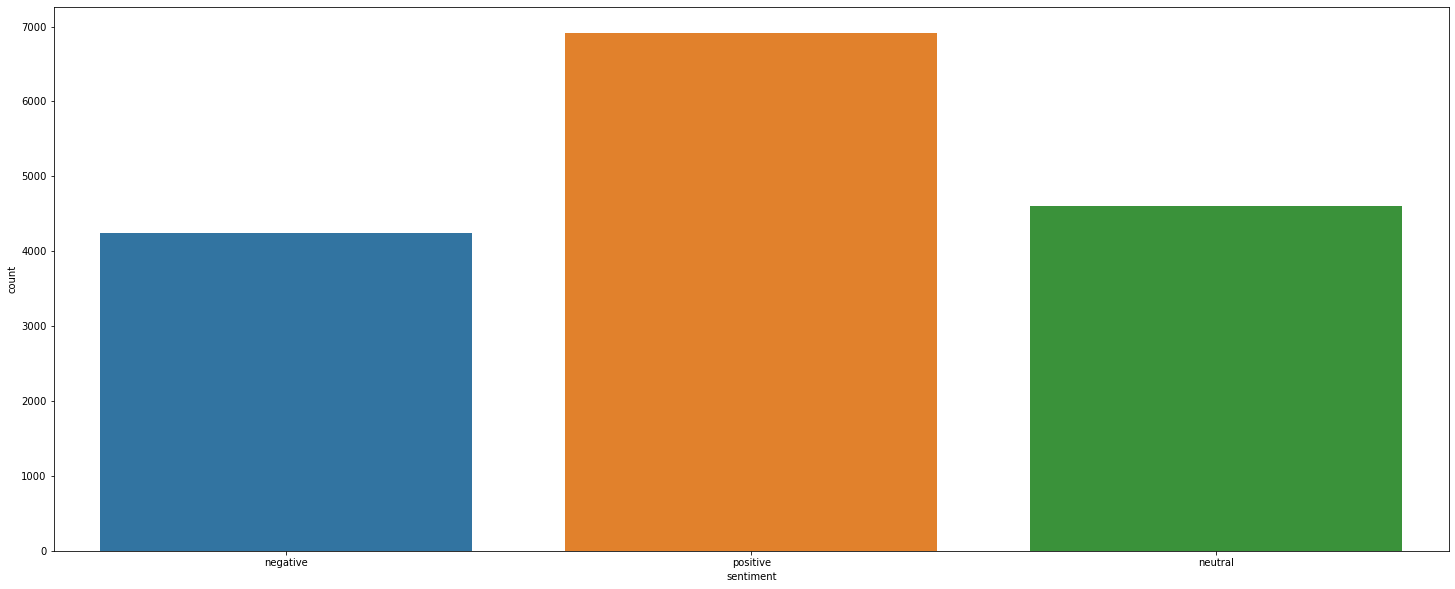

In [50]:
print("\nNumber of instances and Classes in Dataset:")
print("======================================================\n")
# Set the figure size
plt.figure(figsize=(25, 10))

sns.countplot(preprocessed_training_data["sentiment"])

# Display the plot
plt.show()

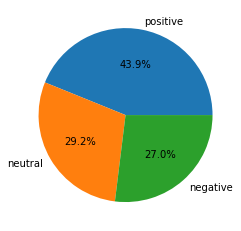

In [57]:
label_count = preprocessed_training_data['sentiment'].value_counts()
labels = ["positive", "neutral","negative"]

plt.pie(label_count, labels=labels, autopct='%1.1f%%')

plt.show()

## Save the Data to CSV file

In [51]:
preprocessed_training_data.to_csv('finalsentimentdata.csv', index=False)

## Data Analysis

## Tokenization

Tokenization is used in natural language processing to split paragraphs and sentences into smaller units that can be more easily assigned meaning. The first step of the NLP process is gathering the data (a sentence) and breaking it into understandable parts (words). 

### Tokenization of Training Data

The tokenization of of words is performed and then the length of each word is measured.

In [52]:
#Tokenize the Training Dataset
Tokens = preprocessed_training_data['text'].apply(word_tokenize)
Tokens = Tokens.to_frame()
Tokens['Token_Length'] = preprocessed_training_data['text'].str.split().apply(lambda x : [len(i) for i in x])
print("\nTraining Data After Tokenization :")
print("=================================\n")
Tokens.head()


Training Data After Tokenization :



,text,Token_Length
0,"[even, cocklane, ghost, laid, round, dozen, ye...","[4, 8, 5, 4, 5, 5, 5, 7, 8, 7, 4, 4, 4, 14, 9,..."
1,"[likely, enough, rough, outhouses, tillers, he...","[6, 6, 5, 9, 7, 5, 5, 8, 5, 9, 7, 3, 4, 5, 11,..."
2,"[daring, burglaries, armed, men, highway, robb...","[6, 10, 5, 3, 7, 9, 4, 5, 7, 5, 5, 8, 8, 9, 2,..."
3,"[giless, search, contraband, goods, mob, fired...","[6, 6, 10, 5, 3, 5, 10, 10, 5, 3, 6, 7, 11, 4,..."
4,"[midst, hangman, ever, busy, ever, worse, usel...","[5, 7, 4, 4, 4, 5, 7, 8, 11, 9, 4, 4, 13, 9, 7..."


### More Data Analysis of Training Data

#### Text Length and Word Count

Let’s start the analysis by adding some more features to the dataset. Here, I am adding the length of the each text and the word count of each text. First, I’ll take a look at the number of characters present in each sentence. This can give us a rough idea about the text length. And further total number of words included in each sentence is also counted

In [53]:
preprocessed_training_data['Text_length'] = preprocessed_training_data['text'].astype(str).apply(len)
preprocessed_training_data['word_count'] = preprocessed_training_data['text'].apply(lambda x: len(str(x).split()))
preprocessed_training_data.head()

,text,sentiment,Text_length,word_count
0,even cocklane ghost laid round dozen years rap...,negative,126,17
1,likely enough rough outhouses tillers heavy la...,negative,201,28
2,daring burglaries armed men highway robberies ...,negative,754,99
3,giless search contraband goods mob fired muske...,negative,115,16
4,midst hangman ever busy ever worse useless con...,negative,317,41


I would like to start by seeing the distribution of the word_count, and text_length. The distribution of text length and the word counts are similar as expected. 

array([[<AxesSubplot:title={'center':'Text_length'}>,
        <AxesSubplot:title={'center':'word_count'}>]], dtype=object)

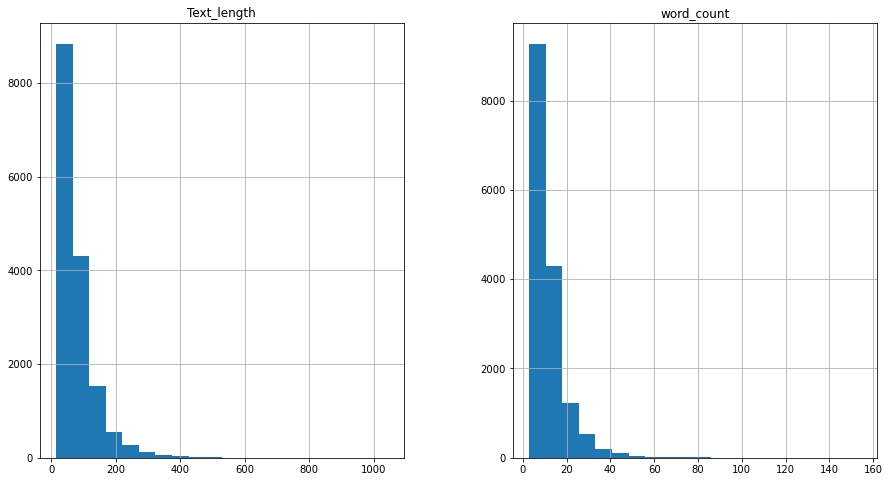

In [54]:
preprocessed_training_data[["Text_length", "word_count"]].hist(bins=20, figsize=(15, 8))

Text(0.5, 0, 'Text length')

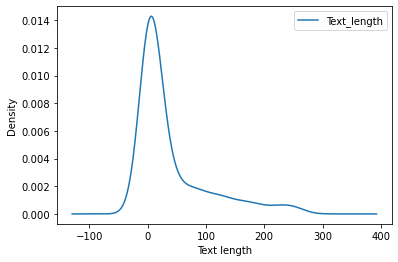

In [55]:
preprocessed_training_data['Text_length'].value_counts().plot(kind='density')
plt.legend()
plt.xlabel('Text length')

## Frequency of Most Occuring Words

Let’s inspect which words other than these stopwords occur frequently. We will use the counter function from the collections library to count and store the occurrences of each word in a list of tuples. This is a very useful function when we deal with word-level analysis in natural language processing. We noticed that Vaccine, covid etc.. words are most frequently used.

In [59]:
# Code Snippet for Top Non-Stopwords Barchart

import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    fig, ax = plt.subplots(figsize=(15, 10))       
    sns.barplot(x=y,y=x, ax=ax)

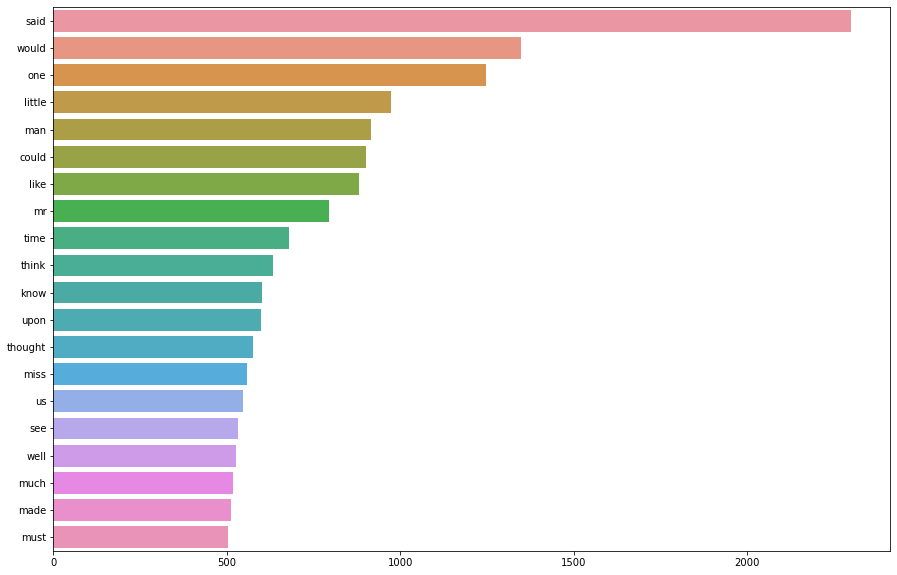

In [60]:
plot_top_non_stopwords_barchart(preprocessed_training_data['text'])

### WordCloud of Training Data

A word cloud is a useful tool in text analysis that visually displays the most commonly used words in a text by enlarging them and using different colors. The larger and bolder the word, the more frequently it appears in the text, while smaller words are less important. This technique helps to represent the importance of words in the context of the text and their frequency.

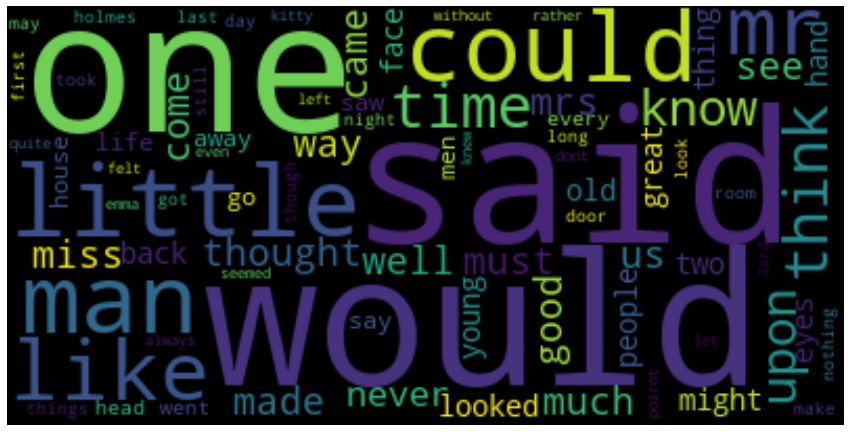

In [61]:
from wordcloud import WordCloud
text = ' '.join(preprocessed_training_data['text'])

# Calculate word frequency, count each word only once
word_freq = preprocessed_training_data['text'].str.split(expand=True).stack().value_counts().apply(lambda x: 1)

wordcloud = WordCloud(max_words=80, contour_width=3).generate_from_frequencies(word_freq)


plt.figure(figsize = (15, 9))
# Display the generated image:
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.show()

## Ngram exploration

This is common practice in text data analysis to make charts of the frequency of words. That gives a good idea about what people are talking about most in this text. First, find the frequency of each word in the text column of the dataset. Then plot the top 20 words based on the frequency.

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(preprocessed_training_data['text'], 20)
df1 = pd.DataFrame(common_words, columns = ['Text', 'count'])
df1

,Text,count
0,said,2298
1,would,1348
2,one,1246
3,little,972
4,man,916
5,could,900
6,like,882
7,mr,793
8,time,680
9,think,633


Here is the bar plot of the frequency of the top 20 words:

<AxesSubplot:title={'center':'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

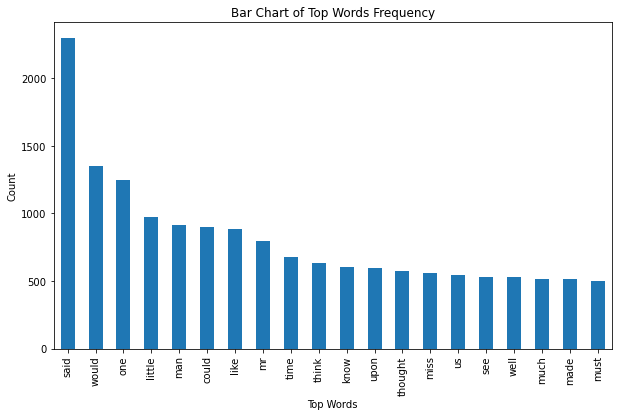

In [63]:
df1.groupby('Text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency"
)

These are the topmost occurring words in the reviews. But instead of just seeing one word two consecutive words or three consecutive words are more helpful. They provide some meaning. We noticed that covid vaccine, get vaccine, side effects etc... are most frequently used bugrams in the dataset. The following plot shows the topmost frequent bigrams.

In [64]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words2 = get_top_n_bigram(preprocessed_training_data['text'], 10)
df2 = pd.DataFrame(common_words2, columns=['Text', "Count"])
df2

,Text,Count
0,said mr,144
1,lord henry,121
2,young man,120
3,dorian gray,120
4,wuthering heights,88
5,lord edgware,75
6,said poirot,67
7,collected novels,65
8,novels virginia,64
9,virginia woolf,64


This is the bar chart of topmost occurring bigrams:

<AxesSubplot:title={'center':'Bar chart of Bigrams Frequency'}, xlabel='Bigram Words', ylabel='Count'>

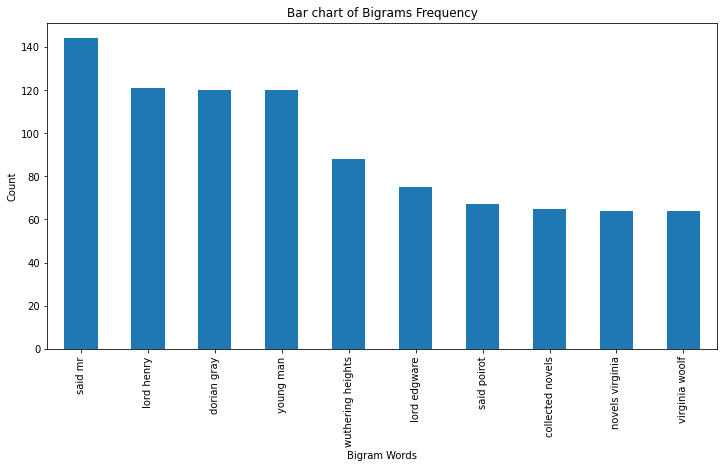

In [65]:
df2.groupby('Text').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Bigram Words",
    ylabel = "Count",
    title = "Bar chart of Bigrams Frequency"
)